## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Connect to Google Drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read all files and concatenate into single dataframe

In [4]:
data_dir = '/content/drive/MyDrive/Datasets/fonts'
csv_files = !ls "{data_dir}"/*.csv
csv_files = [file.strip() for file in csv_files]
csv_files = csv_files[:len(csv_files)//2]

Here

```
csv_files = csv_files[:len(csv_files)//2]
```

 we are actually using only half of files, because of the restrictions in memory of Colaboratory.

In [5]:
dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

In [6]:
df.head(10)

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,AGENCY,AGENCY FB,64258,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
1,AGENCY,AGENCY FB,64257,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
2,AGENCY,AGENCY FB,61442,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
3,AGENCY,AGENCY FB,61441,0.4,0,0.0,35,21,51,22,...,1,1,1,1,1,1,163,255,255,255
4,AGENCY,AGENCY FB,9674,0.4,0,0.0,51,21,33,25,...,255,132,1,1,1,1,1,1,1,1
5,AGENCY,AGENCY FB,8805,0.4,0,0.0,51,23,30,17,...,255,255,255,255,255,255,255,255,255,255
6,AGENCY,AGENCY FB,8804,0.4,0,0.0,51,22,30,17,...,255,255,255,255,255,255,255,255,255,255
7,AGENCY,AGENCY FB,8800,0.4,0,0.0,47,23,37,23,...,1,1,1,1,1,1,1,1,1,1
8,AGENCY,AGENCY FB,8776,0.4,0,0.0,53,26,22,23,...,1,1,20,24,74,255,255,255,255,54
9,AGENCY,AGENCY FB,8747,0.4,0,0.0,35,19,64,16,...,176,116,48,0,0,0,0,0,0,0


## Extract features and labels from dataframe

In [7]:
features = df.iloc[:, 12:].values
labels = df['font'].values

## Plot some pictures from dataset

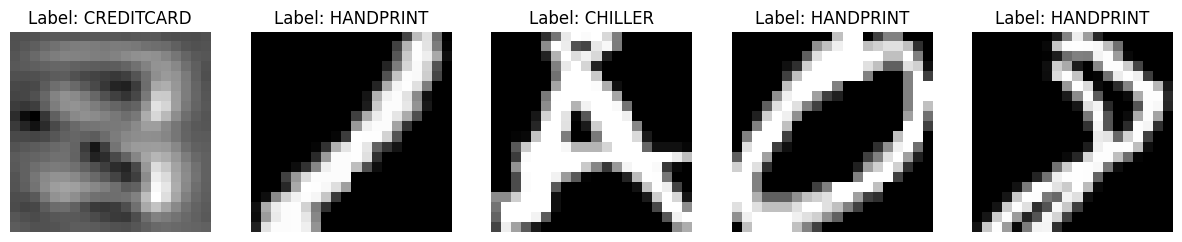

In [8]:
num_examples_to_show = 5

random_indices = np.random.choice(len(features), num_examples_to_show, replace=False)
plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices, 1):
    image_data = features[idx].reshape(20, 20)
    label = df['font'][idx]

    plt.subplot(1, num_examples_to_show, i)
    plt.imshow(image_data, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()

## Set encoder for labels, normalise values to (0, 1) range, split the data to train and test

In [9]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

features = features.astype(np.float64) / 255

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Build the model
We are using 2 hidden layers with 256 and 128 neurons respectively, input layer with 400 neurons and output layer with number of classes (76) neurons. Also we are using one additional Dropout layer to avoid overfitting with 50% of values being set to 0.
As an optimizer we are using ADAM and minimize sparse Cross-Entropy loss. Model is learning during 20 epochs and using batch size 64.

In [11]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(400, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
3415/3415 [==============================] - 36s 10ms/step - loss: 2.3126 - accuracy: 0.4431 - val_loss: 1.9824 - val_accuracy: 0.4972
Epoch 2/20
3415/3415 [==============================] - 32s 9ms/step - loss: 1.9497 - accuracy: 0.4981 - val_loss: 1.8005 - val_accuracy: 0.5280
Epoch 3/20
3415/3415 [==============================] - 33s 10ms/step - loss: 1.8125 - accuracy: 0.5229 - val_loss: 1.7037 - val_accuracy: 0.5484
Epoch 4/20
3415/3415 [==============================] - 32s 9ms/step - loss: 1.7268 - accuracy: 0.5402 - val_loss: 1.6330 - val_accuracy: 0.5622
Epoch 5/20
3415/3415 [==============================] - 36s 10ms/step - loss: 1.6672 - accuracy: 0.5525 - val_loss: 1.5868 - val_accuracy: 0.5738
Epoch 6/20
3415/3415 [==============================] - 33s 10ms/step - loss: 1.6169 - accuracy: 0.5630 - val_loss: 1.5725 - val_accuracy: 0.5775
Epoch 7/20
3415/3415 [==============================] - 43s 13ms/step - loss: 1.5829 - accuracy: 0.5703 - val_loss: 1.5286 - v

In [12]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

2135/2135 [==============================] - 5s 3ms/step - loss: 1.3818 - accuracy: 0.6228
Test Accuracy: 0.6228495240211487


## As a conclusion, we got a model with 62.2% accuracy, which is actually not too bad, and also we avoided the overfitting